In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")




In [2]:
df = pd.read_csv('tsa_store_data.csv')

In [3]:
df

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912996,2017-12-27,63,8503 NW Military Hwy,78231,San Antonio,TX
912996,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912997,2017-12-28,59,8503 NW Military Hwy,78231,San Antonio,TX
912997,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912998,2017-12-29,74,8503 NW Military Hwy,78231,San Antonio,TX
912998,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912999,2017-12-30,62,8503 NW Military Hwy,78231,San Antonio,TX


In [4]:
df.sale_date = pd.to_datetime(df.sale_date)
# Sort rows by the date and then set the index as that date
df['month'] = df.sale_date.dt.month
df['day'] = df.sale_date.dt.day_name()
df = df.set_index("sale_date").sort_index()


In [5]:
df

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,Tuesday
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,1,Tuesday
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,Sunday
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,Sunday
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,12,Sunday


<AxesSubplot:>

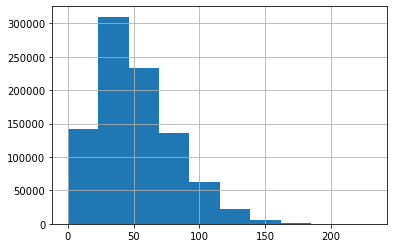

In [6]:
df_sale_amount = df.sale_amount
df_sale_amount.hist()

<AxesSubplot:>

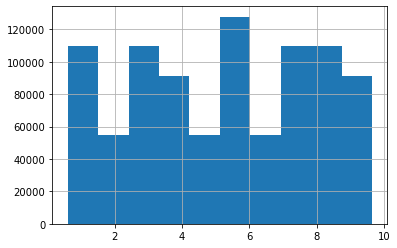

In [7]:
df_item_price = df.item_price
df_item_price.hist()

In [8]:
df['sales_total'] = df.sale_amount * df.item_price

In [9]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

In [10]:
df2 = pd.read_csv(url)

In [11]:
df2.to_csv('power_data')

In [12]:
df2

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [13]:
df2.Date = pd.to_datetime(df2.Date)
df['month'] = df2.Date.dt.month
df['year'] = df2.Date.dt.year
df2 = df2.set_index("Date").sort_index()


In [14]:
df2

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [15]:
df2.Wind = df2.Wind.fillna(0)

In [16]:
df2.Solar = df2.Solar.fillna(0)

In [17]:
df2['Wind+Solar'] = df2['Wind+Solar'].fillna(df2.Wind + df2.Solar)

In [18]:
df2

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,0.000,0.000,0.000
2006-01-02,1380.52100,0.000,0.000,0.000
2006-01-03,1442.53300,0.000,0.000,0.000
2006-01-04,1457.21700,0.000,0.000,0.000
2006-01-05,1477.13100,0.000,0.000,0.000
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


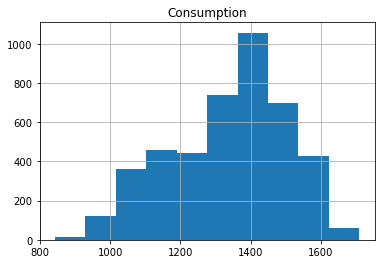

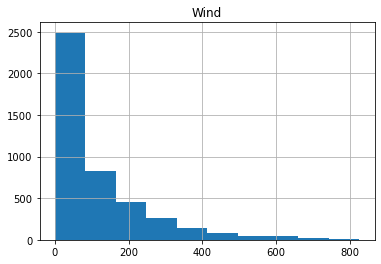

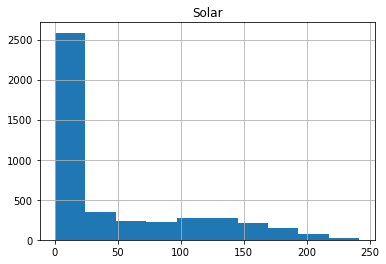

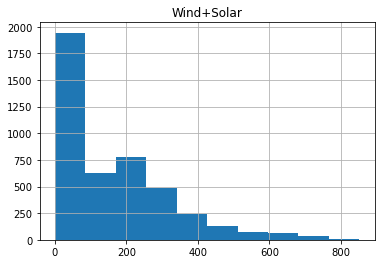

In [19]:
for col in df2:
    plot = df2[col]
    plot.hist()
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='Date'>

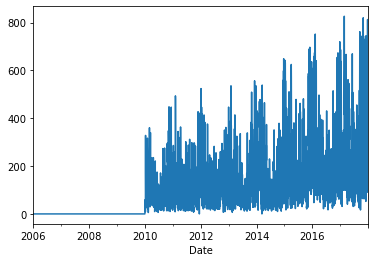

In [20]:
df2.Wind.plot()